In [1]:
import numpy as np
# Creating an Array
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])

m,n = A.shape # m-observations, n-features

print("Array:")
print(A) # our array

print("---")
print("Dimensions:")
print(A.shape) # shape

print("---")
print("Mean across Rows:")
print(np.mean(A,axis=0))

Array:
[[ 3  7]
 [-4 -6]
 [ 7  8]
 [ 1 -1]
 [-4 -1]
 [-3 -7]]
---
Dimensions:
(6, 2)
---
Mean across Rows:
[0. 0.]


In [2]:
# Converting the array into a DataFrame ...
import pandas as pd
df = pd.DataFrame(A, columns = ['a0', 'a1'])
df

,a0,a1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [3]:
## means of respective columns

A.mean(axis=0)

array([0., 0.])

In [4]:
## Covariance

df.cov()

,a0,a1
a0,20.0,25.0
a1,25.0,40.0


In [5]:
## The Linear Algebra way of computing Covariance

# Covariance = Transpose(A) * A / (m-1)

sigma = A.T @ A / (df.shape[0]-1)
sigma

array([[20., 25.],
       [25., 40.]])

In [6]:
## Eigen Vals and Eigen Vectors

l, X = np.linalg.eig(sigma)

print(f"Eigen Vals: {l}")
print(f"Eigen Vectors: \n{X}")

Eigen Vals: [ 3.07417596 56.92582404]
Eigen Vectors: 
[[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


In [7]:
## Since we know that A.v = lambda * v
# where v is Eigen Vector, A being the linear transformation and the lamda being the EigenVal

# Let's cross-check

## LHS i.e. linear transformation * Eigen vector
sigma @ X

array([[ -2.54562438, -31.91425695],
       [  1.72347161, -47.13840945]])

In [8]:
## RHS i.e. EigenVal * EigenVec
l * X

array([[ -2.54562438, -31.91425695],
       [  1.72347161, -47.13840945]])

#### => Exactly same!

In [9]:
print("The first principal component is eigenvector with largest eigenvalue:")
print(X[:,1])
print("---")
print("Second principal component:")
print(X[:,0])

The first principal component is eigenvector with largest eigenvalue:
[-0.56062881 -0.82806723]
---
Second principal component:
[-0.82806723  0.56062881]


In [10]:
# Are the two Principal components Orthogonal?!
# If the dot product of two matrices is zero, then they are considered to be orthogonal.

X[:,1].T @ X[:,0]

0.0

In [11]:
# change to matrix
Amat = np.asmatrix(A)
Xmat = np.asmatrix(X)
Amat

matrix([[ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]])

In [12]:
# Choose eigenvector with highest eigenvalue as first principal component
pc1 = Xmat[:,1]
pc1

matrix([[-0.56062881],
        [-0.82806723]])

In [13]:
## Compressed Version of A

Acomp = Amat @ pc1 # the dot product of a 6x2 and 2x1 matrix yields a 6x1 matrix
print("Compressed version of A:")
print(Acomp)

Compressed version of A:
[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]


In [14]:
df.columns

Index(['a0', 'a1'], dtype='object')

#### => Now without any hesitation we can use this compressed version of features `a0` and `a1`.

## # Application of PCA to the Digits Data

The dimensionality reduction might seem a bit abstract in two dimensions, but the projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.  Let's implement PCA to the digits data. This data consists of a collection of different points in the plane to represent a digit


In [16]:
from sklearn.decomposition import PCA

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


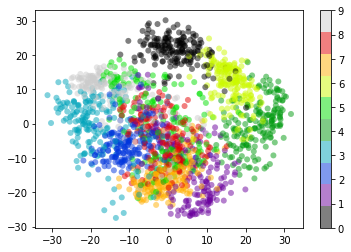

In [18]:
# Creating a scatter plot of the datapoints

import matplotlib.pyplot as plt

plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

#### => This gives us an idea of the relationship between the datapoints. Essentially, we have found the optimal stretch and rotation in 64-dimensional space and tried to fit it to a 2-Dimensional space that allows us to see the layout of the digits, **without reference** to the labels.

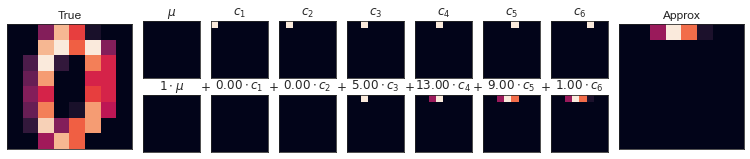

In [24]:
# Before running this, download the fig_code library from Git
import seaborn as sns
from fig_code.figures import plot_image_components

sns.set_style('white')
plot_image_components(digits.data[0])

In [25]:
from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

ModuleNotFoundError: No module named 'IPython.html'